<a href="https://colab.research.google.com/github/Mateus-Brandao/Estudo/blob/main/Classificacao_Imagens_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model

In [2]:
# baixando a base de dados e dividindo em treino e teste
data = keras.datasets.fashion_mnist
((x_treino, y_treino), (x_teste, y_teste)) = data.load_data()

In [23]:
x_treino[0].shape

(28, 28)

In [3]:
print(f'Tamanho das amostras de treino {len(x_treino)}')
print(f'Tamanho das amostras de teste {len(x_teste)}')

Tamanho das amostras de treino 60000
Tamanho das amostras de teste 10000


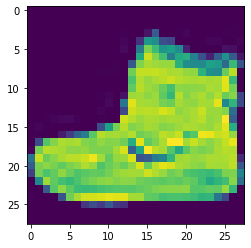

In [4]:
plt.imshow(x_treino[0])

In [5]:
print(y_treino.min())
print(y_treino.max())

# pode-se concluir que existem 10 tipos de classificações
total_classificacoes = 10

0
9


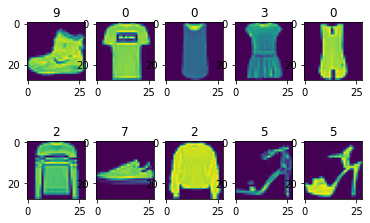

In [6]:
for imagem in range (10):
  plt.subplot(2, 5 , imagem + 1)
  plt.imshow(x_treino[imagem])
  plt.title(y_treino[imagem])

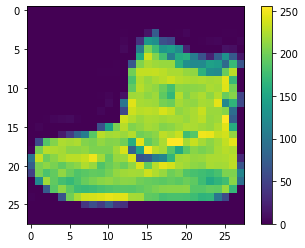

In [7]:
plt.imshow(x_treino[0])
plt.colorbar()

In [8]:
nomes_classificacoes = ['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']

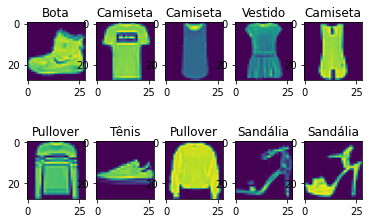

In [9]:
for imagem in range (10):
  plt.subplot(2, 5 , imagem + 1)
  plt.imshow(x_treino[imagem])
  plt.title(nomes_classificacoes[y_treino[imagem]])

Sequência do modelo:
- Entrada
- Processamento
- Saida

# Criando e treinando o modelo

In [10]:
# normalização para reduzir as perdas
x_treino = x_treino / 255.0

In [11]:
"""
1 linha - definindo o modelo com keras, criando a camada 0 achatando as imagens de 28 x 28 pixels em um array de 784 pixels.
2 linha - criando a camada 1, que estabelece comunicação com a camada 0, em todos os componentes. O 256 representa o número de componentes da camada, e o activation é o tipo de comunicação.
3 linha - o dropout serve pra deixar uma parte das camadas dormentes, neste caso foram 20%.
4 linha - o softmax fala qual a porcentagem de cada imagem ser de cada categoria e mostra a maior delas. o 10 é o numero de categorias que temos para classificar.
"""

modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(256, activation = tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 0.5324 - accuracy: 0.8114 - val_loss: 0.4090 - val_accuracy: 0.8559
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3987 - accuracy: 0.8552 - val_loss: 0.3676 - val_accuracy: 0.8673
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3642 - accuracy: 0.8666 - val_loss: 0.3484 - val_accuracy: 0.8786
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3406 - accuracy: 0.8731 - val_loss: 0.3361 - val_accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3251 - accuracy: 0.8800 - val_loss: 0.3299 - val_accuracy: 0.8827


In [12]:
# verificando o historico do modelo
historico.history

{'accuracy': [0.8113541603088379,
  0.8552291393280029,
  0.8666458129882812,
  0.8731458187103271,
  0.8799583315849304],
 'loss': [0.5324077606201172,
  0.3986607789993286,
  0.36421239376068115,
  0.3405580520629883,
  0.32512468099594116],
 'val_accuracy': [0.8559166789054871,
  0.8673333525657654,
  0.8785833120346069,
  0.8807500004768372,
  0.8827499747276306],
 'val_loss': [0.40902429819107056,
  0.3676161766052246,
  0.34835925698280334,
  0.3360700011253357,
  0.3298761248588562]}

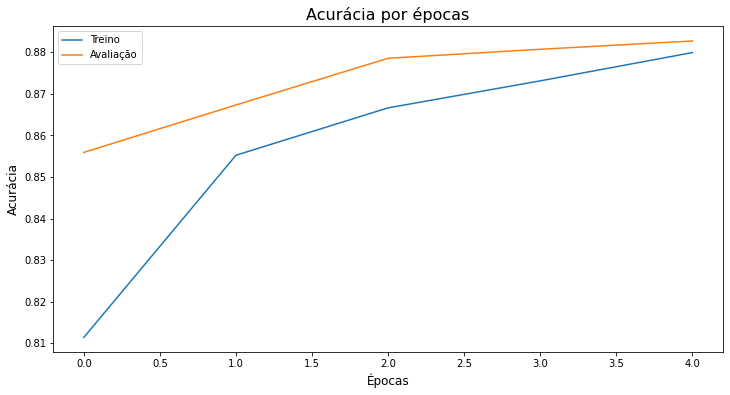

In [13]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Acurácia', fontsize = 12)
plt.legend(['Treino','Avaliação'])

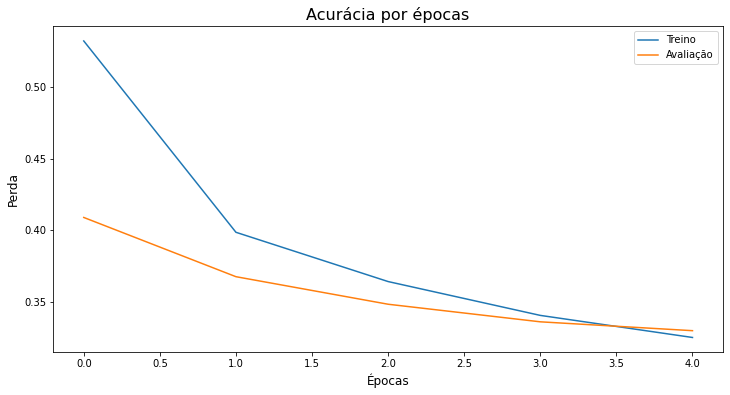

In [14]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Acurácia por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Perda', fontsize = 12)
plt.legend(['Treino','Avaliação'])

# Testando o modelo

In [16]:
testes = modelo.predict(x_teste)
print('Resultados do teste: ', np.argmax(testes[0]))
print('Numero da imagem de teste: ', y_teste[0])


Resultados do teste:  9
Numero da imagem de teste:  9


In [17]:
print('Resultados do teste: ', np.argmax(testes[1]))
print('Numero da imagem de teste: ', y_teste[1])

Resultados do teste:  2
Numero da imagem de teste:  2


In [18]:
print('Resultados do teste: ', np.argmax(testes[2]))
print('Numero da imagem de teste: ', y_teste[2])

Resultados do teste:  1
Numero da imagem de teste:  1


# Avaliando o modelo

In [19]:
perda_teste, acuracia_teste = modelo.evaluate(x_teste, y_teste)
print('Perda do teste: ', perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 54.8816 - accuracy: 0.8598
Perda do teste:  54.881587982177734
Acuracia do teste:  0.8597999811172485


# Salvando o modelo

In [20]:
# salvando o modelo 
modelo.save('modelo.h5')

# carregando o modelo
modelo_salvo = load_model('modelo.h5')